# SPOTIFY - MINI PROJECT DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data_by_genres = pd.read_csv("data_by_genres.csv")

In [4]:
data_by_year = pd.read_csv("data_by_year.csv")

In [5]:
data_by_artist = pd.read_csv("data_by_artist.csv")

In [6]:
data_w_genres = pd.read_csv("data_w_genres.csv")

In [7]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [8]:
data_by_genres.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


In [9]:
data_w_genres.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]


# TASK1 - TIME SERIES ANALYSIS

In [10]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [11]:
data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [12]:
data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [15]:
data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [16]:
data.drop(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode','release_date', 'speechiness', 'tempo',
       'valence'],axis=1,inplace=True)

In [17]:
data.head()

,name,popularity,year
0,Singende Bataillone 1. Teil,0,1928
1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928
2,Chapter 1.18 - Zamek kaniowski,0,1928
3,Bebamos Juntos - Instrumental (Remasterizado),0,1928
4,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928


In [18]:
data.to_csv('C:\\Users\\Disha\\sample_project_1',index=False,header=True)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Disha\\sample_project_1'

In [19]:
# grouping by year
year_grouping = data.groupby(['year'],as_index=False)

# year:popularity
popularity_track = year_grouping[['name','popularity']].sum()
popularity_track


,year,popularity
0,1921,45
1,1922,10
2,1923,968
3,1924,143
4,1925,712
...,...,...
95,2016,120840
96,2017,129723
97,2018,134552
98,2019,139311


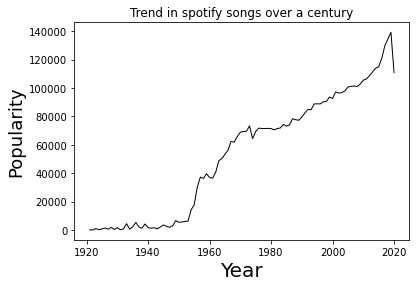

In [20]:
fig,ax1=plt.subplots()

ax1.plot(popularity_track.year,popularity_track.popularity,color='black',linewidth=1)
ax1.set_xlabel('Year',fontsize=20)
ax1.set_ylabel('Popularity',color='Black',fontsize=18)
plt.title('Trend in spotify songs over a century')

plt.show()

In [21]:
popularity_track.describe()

,year,popularity
count,100.000000,100.000000
mean,1970.500000,53617.520000
std,29.011492,42399.207774
min,1921.000000,10.000000
25%,1945.750000,4040.250000
50%,1970.500000,67311.000000
75%,1995.250000,88822.250000
max,2020.000000,139311.000000


In [22]:
#creating moving average
moving_avg = popularity_track.rolling(window=10).mean()

In [23]:
print(moving_avg)

      year  popularity
0      NaN         NaN
1      NaN         NaN
2      NaN         NaN
3      NaN         NaN
4      NaN         NaN
..     ...         ...
95  2011.5    108689.5
96  2012.5    111520.1
97  2013.5    114870.9
98  2014.5    118530.0
99  2015.5    119059.6

[100 rows x 2 columns]


<AxesSubplot:>

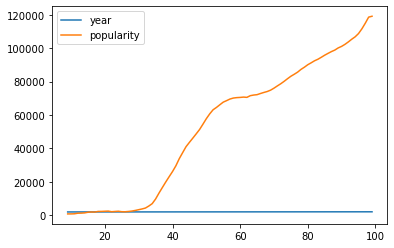

In [24]:
#plotting moving average
moving_avg.plot()

In [25]:
popularity_track

,year,popularity
0,1921,45
1,1922,10
2,1923,968
3,1924,143
4,1925,712
...,...,...
95,2016,120840
96,2017,129723
97,2018,134552
98,2019,139311


In [26]:
 popularity_track.set_index('year',inplace=True)

In [27]:
popularity_track

,popularity
year,
1921,45
1922,10
1923,968
1924,143
1925,712
...,...
2016,120840
2017,129723
2018,134552


In [28]:
popularity_track_base = pd.concat([popularity_track,popularity_track.shift(1)],axis=1)

In [29]:
popularity_track_base

,popularity,popularity
year,,
1921,45,NaN
1922,10,45.0
1923,968,10.0
1924,143,968.0
1925,712,143.0
...,...,...
2016,120840,114987.0
2017,129723,120840.0
2018,134552,129723.0


In [30]:
popularity_track_base.columns =['Actual sales','Forecast_sales']

In [31]:
popularity_track_base.head()

,Actual sales,Forecast_sales
year,,
1921,45,NaN
1922,10,45.0
1923,968,10.0
1924,143,968.0
1925,712,143.0


In [32]:
popularity_track_base.dropna(inplace=True)

In [33]:
popularity_track_base.columns

Index(['Actual sales', 'Forecast_sales'], dtype='object')

In [34]:
popularity_track_base.head()

,Actual sales,Forecast_sales
year,,
1922,10,45.0
1923,968,10.0
1924,143,968.0
1925,712,143.0
1926,1410,712.0


In [35]:
#calculation of error in actual and forecast sales

from sklearn.metrics import mean_squared_error
import numpy as np



In [36]:
popularity_error = mean_squared_error(popularity_track_base["Actual sales"],popularity_track_base["Forecast_sales"])

In [37]:
popularity_error

18276385.454545453

In [38]:
np.sqrt(popularity_error)

4275.088941126893

In [39]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

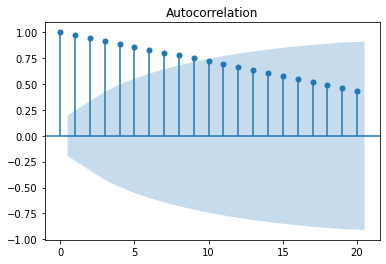

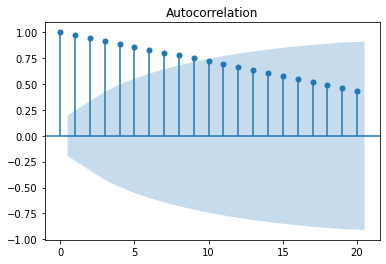

In [40]:
plot_acf(popularity_track)

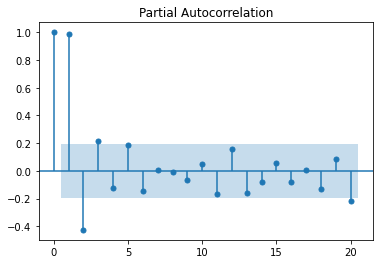

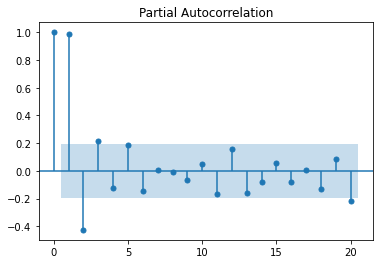

In [41]:
plot_pacf(popularity_track)

In [42]:
from statsmodels.tsa.arima_model import ARIMA


In [43]:
pop_train = popularity_track[0:70]
pop_test = popularity_track[70:100]

In [44]:
pop_model=ARIMA(pop_train,order=(2,1,3))

C:\Users\Disha\sample_project_1\env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Disha\sample_project_1\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will b

In [45]:
pop_model_fit=pop_model.fit()

C:\Users\Disha\sample_project_1\env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [46]:
pop_model_fit.aic

1309.0813362986883

In [47]:
popularity_forecast = pop_model_fit.forecast(steps=30)[0]

In [48]:
np.sqrt(mean_squared_error(pop_test,popularity_forecast))

9245.519777718706

# TASK2 - RECOMMENDATION ENGINE

In [49]:
data_w_genres.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]


In [50]:
data_by_artist.head()


,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9


In [51]:
song_df = pd.read_csv('data_w_genres.csv',usecols=['artists','genres'])

In [52]:
rating_df = pd.read_csv('data_by_artist.csv',usecols=['artists','count','popularity'])

In [53]:
song_df.head()

,artists,genres
0,"""Cats"" 1981 Original London Cast",['show tunes']
1,"""Cats"" 1983 Broadway Cast",[]
2,"""Fiddler On The Roof” Motion Picture Chorus",[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",[]


In [54]:
rating_df.head()

,artists,popularity,count
0,"""Cats"" 1981 Original London Cast",38.000000,12
1,"""Cats"" 1983 Broadway Cast",33.076923,26
2,"""Fiddler On The Roof” Motion Picture Chorus",34.285714,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",34.444444,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",42.555556,9


In [55]:
df=pd.merge(song_df,rating_df,on='artists')

In [56]:
df.head()

,artists,genres,popularity,count
0,"""Cats"" 1981 Original London Cast",['show tunes'],38.000000,12
1,"""Cats"" 1983 Broadway Cast",[],33.076923,26
2,"""Fiddler On The Roof” Motion Picture Chorus",[],34.285714,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",[],34.444444,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",[],42.555556,9


In [57]:
df.dropna()

,artists,genres,popularity,count
0,"""Cats"" 1981 Original London Cast",['show tunes'],38.000000,12
1,"""Cats"" 1983 Broadway Cast",[],33.076923,26
2,"""Fiddler On The Roof” Motion Picture Chorus",[],34.285714,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",[],34.444444,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",[],42.555556,9
...,...,...,...,...
27616,鳳飛飛,"['c-pop', 'classic mandopop', 'vintage chinese...",35.000000,2
27617,黃品源,"['c-pop', 'classic cantopop', 'classic mandopop']",47.000000,2
27618,黃國隆,[],20.000000,11
27619,黃蜀娟,[],23.000000,42


In [58]:
df.drop(['artists'],axis=1)

,genres,popularity,count
0,['show tunes'],38.000000,12
1,[],33.076923,26
2,[],34.285714,7
3,[],34.444444,27
4,[],42.555556,9
...,...,...,...
27616,"['c-pop', 'classic mandopop', 'vintage chinese...",35.000000,2
27617,"['c-pop', 'classic cantopop', 'classic mandopop']",47.000000,2
27618,[],20.000000,11
27619,[],23.000000,42


In [59]:
df["average rating"] = df["popularity"] * df["count"]

In [60]:
df.head()

,artists,genres,popularity,count,average rating
0,"""Cats"" 1981 Original London Cast",['show tunes'],38.000000,12,456.0
1,"""Cats"" 1983 Broadway Cast",[],33.076923,26,860.0
2,"""Fiddler On The Roof” Motion Picture Chorus",[],34.285714,7,240.0
3,"""Fiddler On The Roof” Motion Picture Orchestra",[],34.444444,27,930.0
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",[],42.555556,9,383.0


In [61]:
df.shape

(27621, 5)

In [62]:
df.sort_values('average rating',ascending=False,inplace=True)

In [63]:
df.head()

,artists,genres,popularity,count,average rating
23445,The Beatles,"['beatlesque', 'british invasion', 'classic ro...",48.060753,823,39554.0
24542,The Rolling Stones,"['album rock', 'british invasion', 'classic ro...",34.573913,1035,35784.0
8103,Frank Sinatra,"['adult standards', 'easy listening', 'lounge']",26.004383,1369,35600.0
2924,Bob Dylan,"['album rock', 'classic rock', 'country rock',...",30.860806,1092,33700.0
7142,Elvis Presley,"['rock-and-roll', 'rockabilly']",33.391919,990,33058.0


In [64]:
#recommended artist

df["artists"].head(1)

23445    The Beatles
Name: artists, dtype: object

# task 3 - PREDICT POPULARITY RATING

In [65]:
data.head()

,name,popularity,year
0,Singende Bataillone 1. Teil,0,1928
1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928
2,Chapter 1.18 - Zamek kaniowski,0,1928
3,Bebamos Juntos - Instrumental (Remasterizado),0,1928
4,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928


In [66]:
data.shape

(169909, 3)

In [67]:
data.isnull().sum()

name          0
popularity    0
year          0
dtype: int64

In [68]:
data["popularity"]= [ 1 if i>=66.5 else 0 for i in data.popularity ]
data["popularity"].value_counts()


0    162612
1      7297
Name: popularity, dtype: int64

In [69]:
a=data[data["popularity"]==1]
a.describe()

,popularity,year
count,7297.0,7297.000000
mean,1.0,2010.801836
std,0.0,13.228049
min,1.0,1956.000000
25%,1.0,2008.000000
50%,1.0,2017.000000
75%,1.0,2019.000000
max,1.0,2020.000000


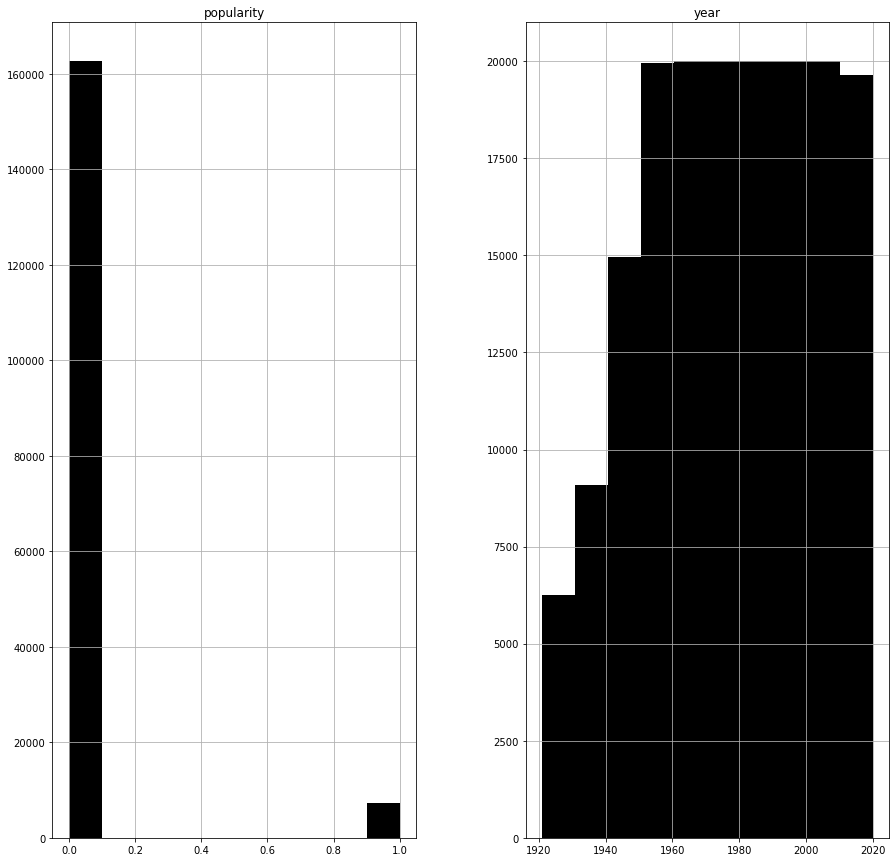

In [70]:
data.hist(figsize=(15, 15), color='black')
plt.show()

# task 4 -  differentiate genres 

In [71]:
from dateutil.parser import parse 

In [72]:
!pip install seaborn
!pip install plotly

In [73]:


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import plotly.express as px
import seaborn as sns


In [74]:
data_w_genres.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]


In [75]:
data_by_genres.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


In [76]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, n_jobs=-1))])

In [77]:
X = data_w_genres.select_dtypes(np.number)

In [78]:
cluster_pipeline.fit(X)

C:\Users\Disha\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=10, n_jobs=-1))])

In [79]:
data_w_genres['cluster'] = cluster_pipeline.predict(X)

In [80]:
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=2))])

In [82]:
genre_embedding = tsne_pipeline.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 27621 samples in 0.121s...
[t-SNE] Computed neighbors for 27621 samples in 23.586s...
[t-SNE] Computed conditional probabilities for sample 1000 / 27621
[t-SNE] Computed conditional probabilities for sample 2000 / 27621
[t-SNE] Computed conditional probabilities for sample 3000 / 27621
[t-SNE] Computed conditional probabilities for sample 4000 / 27621
[t-SNE] Computed conditional probabilities for sample 5000 / 27621
[t-SNE] Computed conditional probabilities for sample 6000 / 27621
[t-SNE] Computed conditional probabilities for sample 7000 / 27621
[t-SNE] Computed conditional probabilities for sample 8000 / 27621
[t-SNE] Computed conditional probabilities for sample 9000 / 27621
[t-SNE] Computed conditional probabilities for sample 10000 / 27621
[t-SNE] Computed conditional probabilities for sample 11000 / 27621
[t-SNE] Computed conditional probabilities for sample 12000 / 27621
[t-SNE] Computed conditional probabilities for sa

In [84]:
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = data_w_genres['genres']
projection['cluster'] = data_w_genres['cluster']

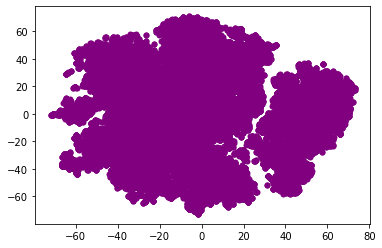

In [86]:
fig = plt.scatter( projection.x, projection.y , c='purple' ,linewidths = 0.01)